In [1]:
# # Installing required packages
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#!pip install plotly
# !pip install sort-dataframeby-monthorweek
!pip install sorted_months_weekdays
!pip install --root-user-action=ignore sort-dataframeby-monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sort_dataframeby_monthorweek as sm
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import pandas as pd
# from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score
from pyspark.sql import SparkSession
import pandas as pd

In [5]:
import pandas as pd

# Store the path to the data file
data_path = "/content/egphotelbookings.csv"

# Load the data into a DataFrame
data = pd.read_csv(data_path, low_memory=False)

# Display the head of each column
print(data.head())


   Unnamed: 0              hotel  is_canceled  lead_time  arrival_date_year  \
0           0  Renaissance Hotel            0        342               2018   
1           1  Renaissance Hotel            0        737               2018   
2           2  Renaissance Hotel            0          7               2018   
3           3  Renaissance Hotel            0         13               2018   
4           4  Renaissance Hotel            0         14               2018   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  ...  assigne

In [6]:
data

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Renaissance Hotel,0,342,2018,July,27,1,0,0,...,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0
1,1,Renaissance Hotel,0,737,2018,July,27,1,0,0,...,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0
2,2,Renaissance Hotel,0,7,2018,July,27,1,0,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0
3,3,Renaissance Hotel,0,13,2018,July,27,1,0,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0
4,4,Renaissance Hotel,0,14,2018,July,27,1,0,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,JW Marriott Hotel,0,23,2017,August,35,30,2,5,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0
119386,119386,JW Marriott Hotel,0,102,2017,August,35,31,2,5,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2
119387,119387,JW Marriott Hotel,0,34,2017,August,35,31,2,5,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4
119388,119388,JW Marriott Hotel,0,109,2017,August,35,31,2,5,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0


In [7]:
data.shape


(119390, 30)

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

There are total 30 variables(categorical and continuous) with one dependent variable(categorical) is_cancelled

##DATA CLEANING

In [9]:
data.isnull().sum()

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# # Dropping columns having high number of missing values
data = data.drop(columns = ['agent','company'],axis=1)

In [11]:
# Handle duplicates:
data.drop_duplicates(inplace=True)


In [12]:
data.isnull().sum()

Unnamed: 0                          0
hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [13]:
data1=data.dropna()

In [14]:
data1.isnull().any().any()

False

In [15]:
data1.describe(include='object')

,hotel,arrival_date_month,meal,country,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,5,10,12,3,4
top,JW Marriott Hotel,August,BB,PRT,TA/TO,A,A,No Deposit,Transient
freq,79302,13852,91863,48586,97730,85601,73863,104163,89174


In [16]:
data1.describe()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,59872.784496,0.371352,104.311435,2018.133148,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,34418.708956,0.483168,106.903309,0.893550,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,30185.250000,0.000000,18.000000,2017.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,59930.500000,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,89663.750000,1.000000,161.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2019.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
data1= data1[data1['adr']<300]

#Exploratory Data Analysis (EDA)\ Data Visualization

 Derive 3 insights about attributes from the dataset using appropriate visualizations

In [18]:
data1['is_canceled'].value_counts(normalize=True)

0    0.628494
1    0.371506
Name: is_canceled, dtype: float64

In [19]:
data1['is_canceled'].value_counts()

0    74545
1    44064
Name: is_canceled, dtype: int64

In [20]:
data1['arrival_date_month'].value_counts(normalize=True)*100

August       11.544655
July         10.591102
May           9.921675
October       9.353422
April         9.309580
June          9.205878
September     8.822265
March         8.210170
February      6.754968
November      5.692654
December      5.641225
January       4.952407
Name: arrival_date_month, dtype: float64

insight 1: August has been the most busy month with 11.6% bookings followed by july (10.62%) and may (9.9%)

In [21]:
data1['customer_type'].value_counts(normalize=True)

Transient          0.749707
Transient-Party    0.211139
Contract           0.034365
Group              0.004789
Name: customer_type, dtype: float64

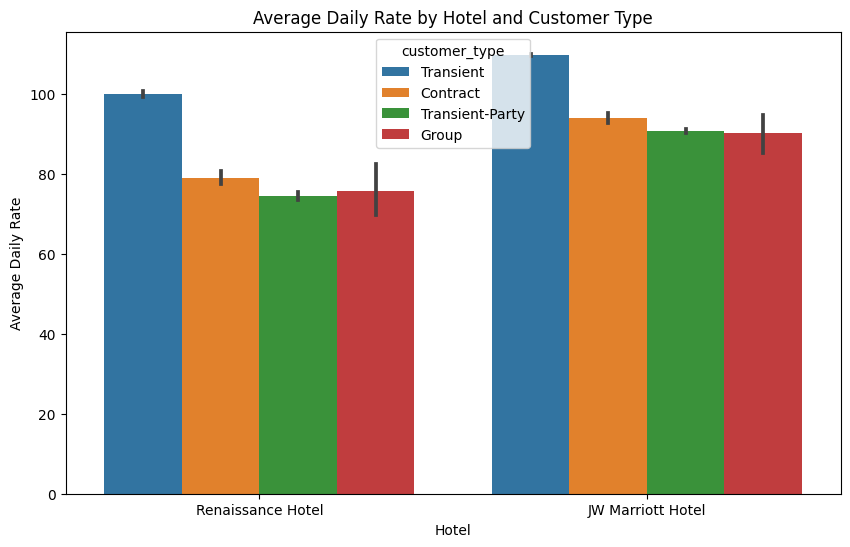

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='adr', hue='customer_type', data=data1)
plt.title('Average Daily Rate by Hotel and Customer Type')
plt.xlabel('Hotel')
plt.ylabel('Average Daily Rate')
plt.show()

insight 2 :In both hotels ,Transient type customers have done majority of bookings 

In [23]:
# Top 5 countries with reservation canceled
canceled_data = data1[data1['is_canceled'] == 1]
top_5_country = canceled_data['country'].value_counts()[:5].reset_index()
top_5_country.columns = ['country','No. of guests']

fig = px.pie(top_5_country,names='country',values='No. of guests',title='Top 5 countries with reservation canceled',template='simple_white')
fig.update_traces(textposition='inside',textinfo='label+value+percent')
fig.show(renderer='colab')

In [24]:
fig = px.choropleth(top_5_country, locations='country',color='No. of guests',
                    title='Top 5 Countries with Bookings Canceled',
                    color_continuous_scale='Viridis',
                    labels={'country': 'Country', 'No. of guests': 'cancellation_count'})

fig.show(renderer='colab')

insight 3:Portugal has got highest cancellation rate

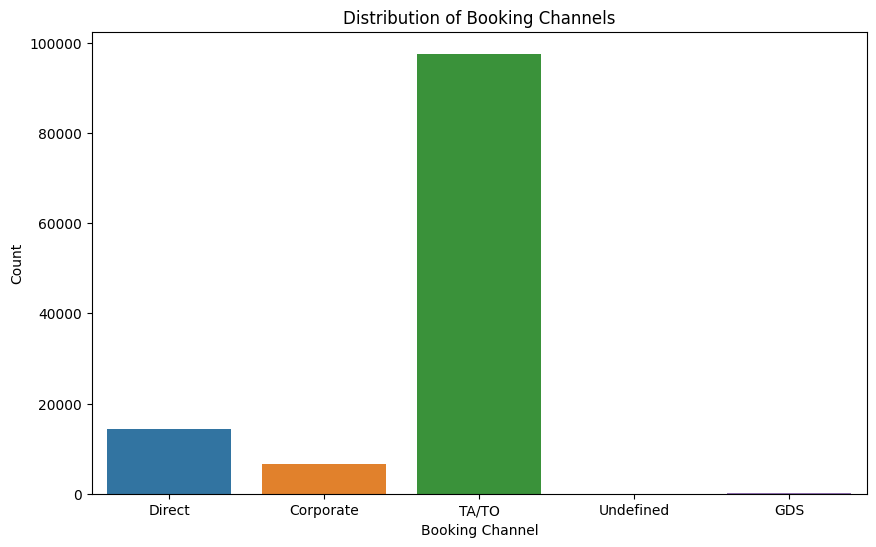

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel', data=data1)
plt.title('Distribution of Booking Channels')
plt.xlabel('Booking Channel')
plt.ylabel('Count')
plt.show()

insight 4: the TA/TO channel experiences a higher cancellation rate, the Corporate channel has relatively few cancellations, while the Direct channel encounters a substantial number of cancellations.

## Come up with 3 promotions to offer per hotel (must be supported by results of queries of your own creation)

In [26]:
import findspark
findspark.init()

In [27]:
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
spark_data = spark.createDataFrame(data1)

# Print the schema of the Spark DataFrame
spark_data.printSchema()

root
 |-- Unnamed: 0: long (nullable = true)
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: long (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: long (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: long (nul

In [28]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Promotion 1: "Family Package"

Query: Determine the percentage of bookings with children for each hotel.

In [40]:

# Calculate the percentage of bookings with children for each hotel
children_count = (spark_data.filter(col('children') > 0)
                  .groupBy('hotel')
                  .count()
                  .withColumnRenamed('count', 'children_count'))

total_count = (spark_data.groupBy('hotel')
               .count()
               .withColumnRenamed('count', 'total_count'))

children_percentage = (children_count.join(total_count, 'hotel')
                       .withColumn('percentage_children_bookings', (col('children_count') / col('total_count')) * 100)
                       .select('hotel', 'percentage_children_bookings'))

# Display the result
children_percentage.show(truncate=False)

+-----------------+----------------------------+
|hotel            |percentage_children_bookings|
+-----------------+----------------------------+
|Renaissance Hotel|8.422470083081379           |
|JW Marriott Hotel|6.394952681388013           |
+-----------------+----------------------------+



Considering that approximately 8.4% and 6.3% of bookings at the Renaissance Hotel and JW mmarriot hotel include children, we can introduce a "Family Package" promotion. This promotion could include special perks and amenities tailored for families, such as discounted rates for children, complimentary meals for children, or family-friendly activities. so we can attract more families to choose the Renaissance Hotel for their stay.

> Indented block




# Promotion 2: "Weekend Getaway"

Query: Calculate the average number of stays in weekend nights for each hotel.

In [44]:
# Calculate the average number of stays in weekend nights for each hotel
from pyspark.sql.functions import avg
average_weekend_stays = (spark_data.groupBy('hotel')
                         .agg(avg('stays_in_weekend_nights').alias('average_weekend_stays')))

# Display the result
average_weekend_stays.show(truncate=False)

+-----------------+---------------------+
|hotel            |average_weekend_stays|
+-----------------+---------------------+
|Renaissance Hotel|1.196397266190706    |
|JW Marriott Hotel|0.7953943217665616   |
+-----------------+---------------------+



Hotel: Renaissance Hotel and jw marriot hotel Average Number of Stays in Weekend Nights: 1.18 and 0.79

Promotion 2: "Weekend Getaway" Considering the average number of stays in weekend nights at both Hotels, we can introduce a "Weekend Getaway" promotion. This promotion could offer exclusive benefits for guests who stay over the weekends, such as discounted rates, complimentary breakfast, late check-out, or access to leisure facilities. By providing special perks tailored for weekend stays, we can attract guests who are seeking a relaxing and enjoyable weekend getaway at the Renaissance Hotel.

# Promotion 3: "Cancellation-Free Corporate Stay"

Query: Calculate the cancellation rates by distribution channel and customer type.

In [45]:
from pyspark.sql.functions import col, sum, count

# Calculate the cancellation rates by distribution channel and customer type
cancellation_rates = spark_data.groupBy('distribution_channel', 'customer_type') \
    .agg((sum(col('is_canceled')) / count('*')).alias('cancellation_rate'))



cancellation_rates.show()



+--------------------+---------------+-------------------+
|distribution_channel|  customer_type|  cancellation_rate|
+--------------------+---------------+-------------------+
|              Direct|          Group| 0.1592920353982301|
|               TA/TO|       Contract|0.31066997518610423|
|               TA/TO|Transient-Party|0.26872892537751064|
|               TA/TO|      Transient| 0.4579736483416629|
|           Corporate|          Group|                0.1|
|              Direct|       Contract|0.10526315789473684|
|           Corporate|       Contract| 0.2962962962962963|
|           Corporate|Transient-Party| 0.2213615980432124|
|           Corporate|      Transient| 0.2259361648655441|
|                 GDS|      Transient|0.19170984455958548|
|              Direct|      Transient| 0.1794321558270056|
|               TA/TO|          Group|0.08235294117647059|
|           Undefined|      Transient|                0.0|
|              Direct|Transient-Party|0.1551480959097320

Promotion: "Cancellation-Free Corporate Stay" Considering the cancellation rates by distribution channel and customer type, we can introduce a "Cancellation-Free Corporate Stay" promotion. This promotion could offer exclusive benefits for corporate customers who book directly through the hotel's website or reservation center. By highlighting the low cancellation rate for corporate bookings made through the Corporate distribution channel, we assure corporate guests that their reservations are secure. Additionally, we can provide a flexible cancellation policy and personalized services to enhance their stay and cater to their business needs. The aim of this promotion is to attract corporate customers, increase direct bookings, and provide a reliable and enjoyable experience for business travelers.

## Using SparkML, produce at least 3 models to predict whether a booking will be canceled or not

In [46]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator 

In [47]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define the feature columns
feature_columns = ["lead_time", "arrival_date_year", "arrival_date_week_number",
                   "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights",
                   "adults", "children", "babies", "is_repeated_guest",
                   "previous_cancellations", "previous_bookings_not_canceled", "booking_changes",
                   "days_in_waiting_list", "adr", "required_car_parking_spaces",
                   "total_of_special_requests"]

# Categorical columns
categorical_columns = ["hotel", "arrival_date_month", "meal", "country",
                       "distribution_channel", "reserved_room_type",
                       "assigned_room_type", "deposit_type", "customer_type"]


In [48]:
# Convert categorical columns to numerical using StringIndexer
indexers = [
    StringIndexer(inputCol=column, outputCol=column + "Index", handleInvalid="skip")
    for column in ["hotel", "arrival_date_month", "meal", "country", "distribution_channel",
                   "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]
]

# One-hot encoding for categorical columns
encoder = OneHotEncoder(
    inputCols=["hotelIndex", "arrival_date_monthIndex", "mealIndex", "countryIndex", "distribution_channelIndex",
               "reserved_room_typeIndex", "assigned_room_typeIndex", "deposit_typeIndex", "customer_typeIndex"],
    outputCols=["hotelVec", "arrival_date_monthVec", "mealVec", "countryVec", "distribution_channelVec",
                "reserved_room_typeVec", "assigned_room_typeVec", "deposit_typeVec", "customer_typeVec"]
)

# Combine the feature columns into a single vector column
assembler = VectorAssembler(
    inputCols=["hotelVec", "arrival_date_monthVec", "mealVec", "countryVec", "distribution_channelVec",
               "reserved_room_typeVec", "assigned_room_typeVec", "deposit_typeVec", "customer_typeVec"],
    outputCol="features"
)

In [54]:
# Split the data into training and testing sets
splits = spark_data.randomSplit([0.6, 0.4], 1234)
train = splits[0]
test = splits[1]


#model 1 : logisticRegression

In [94]:
# Create the logistic regression model
lr = LogisticRegression(labelCol="is_canceled", featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=indexers + [encoder, assembler, lr])




In [97]:
#train model
lr_model = pipeline.fit(train)

In [95]:
# lr_pipeline = Pipeline(stages=[lr])

In [98]:
predictions = lr_model.transform(test)

In [99]:
true_labels=predictions.select('is_canceled')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Logistic Regression Accuracy =",accuracy*100,"%")

Logistic Regression Accuracy = 75.617368565343 %


In [100]:
predicted_labels = predictions.select('is_canceled','prediction')
predicted_labels.show()

+-----------+----------+
|is_canceled|prediction|
+-----------+----------+
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          1|       1.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       1.0|
|          0|       0.0|
|          1|       1.0|
|          0|       1.0|
|          1|       0.0|
|          0|       0.0|
|          1|       1.0|
|          1|       1.0|
|          0|       1.0|
|          1|       1.0|
|          0|       0.0|
|          0|       0.0|
+-----------+----------+
only showing top 20 rows



In [102]:
from pyspark.sql.functions import when
predicted_labels = predictions.select('is_canceled', 'prediction')
# Map the numerical prediction values to 'Yes' or 'No' labels
predicted_labels = predicted_labels.withColumn('prediction_label', when(predicted_labels.prediction == 1, 'Yes').otherwise('No'))
predicted_labels.show()


+-----------+----------+----------------+
|is_canceled|prediction|prediction_label|
+-----------+----------+----------------+
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          1|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       1.0|             Yes|
|          0|       0.0|              No|
|          1|       1.0|             Yes|
|          0|       1.0|             Yes|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          1|       1.0|             Yes|
|          1|       1.0|             Yes|
|          0|       1.0|             Yes|
|          1|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       0.0|              No|
+-----------+----------+----------

#model 2 : Decision Tree Classifier

In [103]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="is_canceled", featuresCol="features", maxBins=64)



In [104]:
pipeline2 = Pipeline(stages=indexers + [encoder, assembler, dt])

In [105]:
# Train the model
dt_model = pipeline2.fit(train)

In [106]:
predictions2 = dt_model.transform(test)

In [107]:
rue_labels=predictions2.select('is_canceled')
dt_predictions=predictions2.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), dt_predictions.toPandas())
print("Decision Tree Classifier =",accuracy*100,"%")

Decision Tree Classifier = 75.98220122735613 %


In [108]:
from pyspark.sql.functions import when
predicted_labels = predictions2.select('is_canceled', 'prediction')
# Map the numerical prediction values to 'Yes' or 'No' labels
predicted_labels = predicted_labels.withColumn('prediction_label', when(predicted_labels.prediction == 1, 'Yes').otherwise('No'))
predicted_labels.show()

+-----------+----------+----------------+
|is_canceled|prediction|prediction_label|
+-----------+----------+----------------+
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
+-----------+----------+----------

## model 3 :Support Vector Machine (SVM) Classifier

In [109]:
from pyspark.ml.classification import LinearSVC

# Create a Support Vector Machine (SVM) Classifier
svm = LinearSVC(labelCol="is_canceled", featuresCol="features")



In [110]:
# Create a pipeline
pipeline3 = Pipeline(stages=indexers + [encoder, assembler, svm])

In [111]:
# Train the model
svm_model = pipeline3.fit(train)

In [115]:
predictions3 = svm_model.transform(test)

In [116]:
rue_labels=predictions3.select('is_canceled')
lr_predictions=predictions3.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Decision Tree Classifier =",accuracy*100,"%")

Decision Tree Classifier = 75.14076635947616 %


In [117]:
from pyspark.sql.functions import when
predicted_labels = predictions3.select('is_canceled', 'prediction')
# Map the numerical prediction values to 'Yes' or 'No' labels
predicted_labels = predicted_labels.withColumn('prediction_label', when(predicted_labels.prediction == 1, 'Yes').otherwise('No'))
predicted_labels.show()

+-----------+----------+----------------+
|is_canceled|prediction|prediction_label|
+-----------+----------+----------------+
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
+-----------+----------+----------